In [1]:
import numpy as np
import pandas as pd
from math import exp, log
from sklearn.linear_model import LogisticRegression

from toy_data import generate_training_data, plot_data

%matplotlib inline

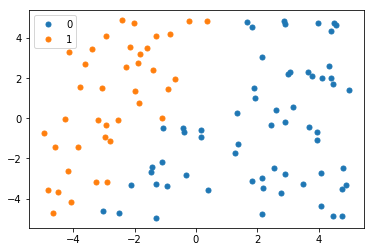

In [2]:
toy_data = generate_training_data(100, -0.5, 1)
plot_data(toy_data)

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def logloss(y, h):
    return -(1-y)*np.log(1-h)-y*np.log(h)

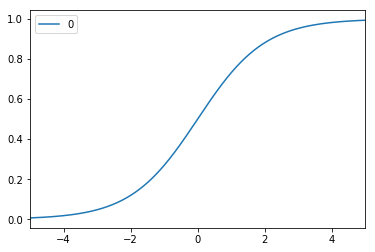

In [4]:
x = np.arange(-5, 5, 0.01)
# df = pd.DataFrame({'y=1': -np.log(h), 'y=0': -np.log(1-h)}, index=h)
df = pd.DataFrame(sigmoid(x), index=x)
df.plot()

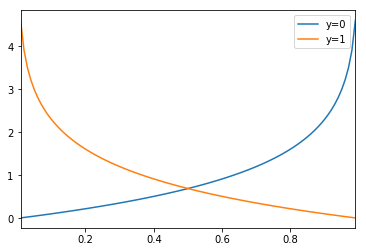

In [5]:
# plot possible values of logloss function
h = np.arange(0.01, 1, 0.01)
# df = pd.DataFrame({'y=1': -np.log(h), 'y=0': -np.log(1-h)}, index=h)
df = pd.DataFrame({'y=1': logloss(1, h), 'y=0': logloss(0, h)}, index=h)
df.plot()

In [6]:
# TODO: implement stochastic gradient descent
class LogReg(object):
    def __init__(self, n_iter=100, lr=0.1, reg=0.1):
        self.n_iter = n_iter
        self.lr = lr
        self.reg = reg

    def learn(self, w, features, labels):
        feature_array = np.concatenate([features, np.ones([len(features), 1])], axis=1)

        guesses = sigmoid(feature_array.dot(w.T))
        gradient = (feature_array.T.dot(guesses-labels) + self.reg*w)/len(labels)
        w_updated = w - self.lr*gradient
        cost = np.average(logloss(labels, guesses))
        return (w_updated, cost)
    
    def train(self, features, labels):
        self.w = np.random.rand(3)
        self.costs = []
        for i in range(self.n_iter):
            (self.w, cost) = self.learn(self.w, features, labels)
            self.costs.append(cost)
    
    def predict(self, features):
        feature_array = np.concatenate([features, np.ones([len(features), 1])], axis=1)
        return sigmoid(feature_array.dot(self.w.T))

In [55]:
features = toy_data.loc[:, ['x0', 'x1']]
labels = toy_data['label']

logreg = LogReg(n_iter=100, lr=0.5)
logreg.train(features, labels)
toy_data['pred'] = logreg.predict(features)
toy_data.head(10)

,label,x0,x1,pred
0,0,-1.294697,-3.271115,0.074647
1,0,-0.394735,-0.658827,0.162258
2,1,-1.310961,4.118719,0.995214
3,0,-2.107766,-3.332195,0.294058
4,1,-4.945547,-0.730413,0.999604
5,0,2.790527,-3.711932,0.000010
6,1,-2.969476,-0.935098,0.969804
7,1,-1.589628,3.484975,0.994787
8,1,-0.232705,4.868411,0.979523
9,1,-4.602885,-1.426485,0.998303


In [56]:
print('accuracy: %s' % np.average(1.0-np.abs(np.round(toy_data['pred'])-toy_data['label'])))

accuracy: 1.0


In [57]:
w = logreg.w
print(w[1]/w[0], w[2]/w[0], logreg.costs[-1])

(-0.5042829836681026, 0.8447096506787167, 0.06098881492895351)


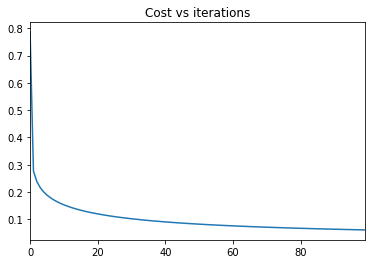

In [59]:
pd.DataFrame(logreg.costs).plot(title="Cost vs iterations", legend=False)

In [60]:
# how does this implementation compare to scikit learn?
logregsk = LogisticRegression()
logregsk.fit(features, labels)
g2 = np.array([g[1] for g in logregsk.predict_proba(features)])
np.average(logloss(labels, g2))

0.06505101772412829